# Mnist Dataset

The dataset contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Loading Mnist dataset from the Internet

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print("Train features:",x_train.shape)
print("Train Labels:  ",y_train.shape)
print("Test Features: ",x_test.shape)
print("Test Labels:   ",y_test.shape)
print("Dimention: ",x_train.ndim)
print("Dimention: ",y_train.ndim)
print("Dimention: ",x_test.ndim)
print("Dimention: ",y_test.ndim)

Train features: (60000, 28, 28)
Train Labels:   (60000,)
Test Features:  (10000, 28, 28)
Test Labels:    (10000,)
Dimention:  3
Dimention:  1
Dimention:  3
Dimention:  1


# Visualizing Data

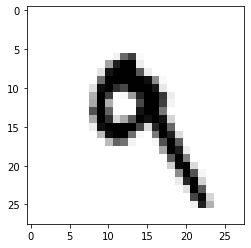

In [4]:
import matplotlib.pyplot as plt
digit  = x_test[7]
plt.imshow(digit,cmap = plt.cm.binary)
plt.show()

# Actual Label

In [5]:
y_test[7]

9

In [6]:
#x_train[1]

# Normalizing Data

Changing Dimension from 3 into 2

As you can see above there are multiple values between 0 to 255 and 255 is Max value so what we're doing is managing the values between 0 and 1 by dividing the train sets by 255.

In [7]:
new_x_train = x_train.reshape(60000, 28 * 28)
new_x_test = x_test.reshape(10000, 28 * 28)
new_x_train, new_x_test = new_x_train/255.0, new_x_test/255.0

In [8]:
#x_train[1]

# One hot encoding

In [9]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train) 
y_test = to_categorical(y_test)

In [10]:
print(new_x_train.ndim)
print(new_x_test.ndim)
print("Train features:",new_x_train.shape)
print("Train Labels:  ",y_train.shape)
print("Test Features: ",new_x_test.shape)
print("Test Labels:   ",y_test.shape)

2
2
Train features: (60000, 784)
Train Labels:   (60000, 10)
Test Features:  (10000, 784)
Test Labels:    (10000, 10)


# First Model

In [11]:
models = tf.keras.Sequential
layers = tf.keras.layers

model = models([layers.Dense(512,activation="relu",input_shape=(28 * 28,)),
                layers.Dense(64,activation="relu"),
                layers.Dense(16,activation="relu"),
                layers.Dense(10, activation='softmax')])

model.compile(optimizer="adam", # adam # rmsprop
             loss="categorical_crossentropy",
             metrics=["accuracy"])

history = model.fit(new_x_train,y_train,epochs=10,validation_split=(0.2))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 170us/sample - loss: 0.2526 - accuracy: 0.9241 - val_loss: 0.1223 - val_accuracy: 0.9641
Epoch 2/10
48000/48000 [==============================] - 7s 148us/sample - loss: 0.0970 - accuracy: 0.9705 - val_loss: 0.1124 - val_accuracy: 0.9677
Epoch 3/10
48000/48000 [==============================] - 7s 146us/sample - loss: 0.0659 - accuracy: 0.9801 - val_loss: 0.1058 - val_accuracy: 0.9702
Epoch 4/10
48000/48000 [==============================] - 7s 149us/sample - loss: 0.0522 - accuracy: 0.9828 - val_loss: 0.1116 - val_accuracy: 0.9701
Epoch 5/10
48000/48000 [==============================] - 7s 150us/sample - loss: 0.0399 - accuracy: 0.9877 - val_loss: 0.1005 - val_accuracy: 0.9732
Epoch 6/10
48000/48000 [==============================] - 8s 159us/sample - loss: 0.0325 - accuracy: 0.9897 - val_loss: 0.1252 - val_accuracy: 0.9692
Epoch 7/10
48000/48000 [==========================

In [12]:
evaluation = model.evaluate(new_x_test,y_test,verbose=2)
print()
print("Loss: ",evaluation[0]*100,"%")
print("Accuracy: ",evaluation[1]*100,"%")

10000/1 - 1s - loss: 0.0499 - accuracy: 0.9772

Loss:  9.96975694473731 %
Accuracy:  97.71999716758728 %


In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Plotting the training and validation loss

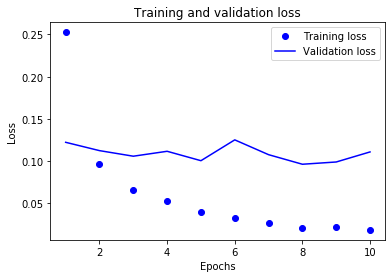

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation Accuracy

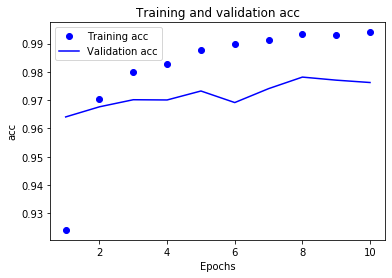

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

# Predict

Predicted value:  9
Actual value:  9


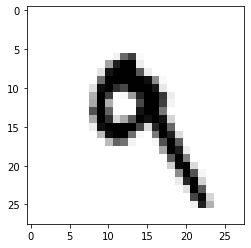

In [20]:
predict = 7
a = model.predict_classes(new_x_test)[predict]
print("Predicted value: ",a)
print("Actual value: ",np.argmax(y_test[predict]))
pic  = x_test[predict]
plt.imshow(pic,cmap = plt.cm.binary)
plt.show()